

I really like Dolly Parton's music, but I want to expand my musical horizons. (If you haven't listened to any Dolly Parton, I recommend *Jolene* in particular.) Build a tool that identifies the most similar artist to Dolly, regardless of genre.. 

Next, use topic modeling, clustering or both to identify the topics covered in Dolly's music and in the other similar artist's music. 


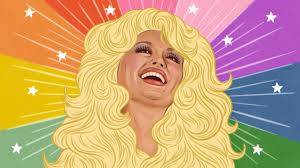


In [2]:
# pip install pyLDAvis

In [3]:
# Import relevant packages and downloads
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import opinion_lexicon
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import sklearn
from sklearn import utils
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, matthews_corrcoef, average_precision_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
import tensorflow as tf
import gensim
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
# from lime.lime_text import LimeTextExplainer
import os
# Import relevant packages and downloads
import pandas as pd
import numpy as np
import sklearn
from sklearn import utils
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, matthews_corrcoef, average_precision_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
import tensorflow as tf
import gensim
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
# from lime.lime_text import LimeTextExplainer
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import gensim.models.keyedvectors as word2vec
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # These are functions from scikit-learn, also known as sklearn
from nltk import RegexpTokenizer
import string
# Download additional NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon


c:\Users\guanhupa\Desktop\WorkSpace\.venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\guanhupa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\guanhupa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\guanhupa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guanhupa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\guanhupa\AppData\Roaming\nltk_d

In [4]:
# Import relevant packages and downloads
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from scipy import sparse
from scipy.sparse import csc_matrix
import nltk
from nltk.tokenize import RegexpTokenizer
import string
import seaborn as sns
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import tensorflow as tf
from sentence_transformers import SentenceTransformer
# Import relevant packages and downloads
import pandas as pd
import numpy as np

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
import sklearn.cluster as cluster
from sklearn.cluster import KMeans

import seaborn as sns

import spacy

import pyLDAvis
import pyLDAvis.sklearn

import matplotlib.pyplot as plt
from collections import Counter

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import RegexpTokenizer

import tensorflow as tf
import warnings;   warnings.filterwarnings("ignore")
from sentence_transformers import SentenceTransformer

c:\Users\guanhupa\Desktop\WorkSpace\.venv\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


In [5]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/content/lyrics_large.csv')
df.head(3)


,song,year,artist,genre,lyrics
0,ego-remix,2009,beyonce-knowles,Pop,Oh baby how you doing You know I'm gonna cut r...
1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...
2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...


In [6]:
# numpy
from numpy.random import seed
seed(1)

# tensorflow
tf.random.set_seed(2)

In [7]:
df_grouped = df.groupby(['artist'])['lyrics'].apply(','.join).reset_index()
# preprocessing and cleaning 
re_tokenizer = RegexpTokenizer("[\\w']+")
punc = string.punctuation 
digits = string.digits 
stopwords_nltk = set(nltk.corpus.stopwords.words('english'))

df_grouped['lyrics_cleaned'] = df_grouped['lyrics'].apply(re_tokenizer.tokenize)
df_grouped['lyrics_cleaned'] = df_grouped['lyrics_cleaned'].apply(lambda x: [word.lower() for word in x])
df_grouped['lyrics_cleaned'] = df_grouped['lyrics_cleaned'].apply(lambda x: [word for word in x if word not in punc])
df_grouped['lyrics_cleaned'] = df_grouped['lyrics_cleaned'].apply(lambda x: [word for word in x if word not in digits])
df_grouped['lyrics_cleaned'] = df_grouped['lyrics_cleaned'].apply(lambda x: [word for word in x if word not in stopwords_nltk])
df_grouped.head()
# detokenizer to list 
from nltk.tokenize.treebank import TreebankWordDetokenizer
df_grouped['lyrics_cleaned'] = df_grouped['lyrics_cleaned'].apply(lambda x: [TreebankWordDetokenizer().detokenize(x)]) # Detokenize
df_grouped['lyrics_cleaned'] = [','.join(map(str, l)) for l in df_grouped['lyrics_cleaned']] # Convert list to single string per row
df_grouped.head()
# Create TFIDF vectors
tfidf_vec = TfidfVectorizer()
tfidf_vectorized = tfidf_vec.fit_transform(df_grouped['lyrics_cleaned']) 
# Compute cosine similarity
tfidf_sim = cosine_similarity(tfidf_vectorized, dense_output=False) 


In [8]:
# View in pairs ranked by similarity
tfidf_pairs_coo = tfidf_sim.tocoo() # Convert to coordinate format  
Artist_1 = pd.DataFrame(tfidf_pairs_coo.row) # Create three sub-dataframes from coo rows
Artist_2 = pd.DataFrame(tfidf_pairs_coo.col) # columns
cosine_sim = pd.DataFrame(tfidf_pairs_coo.data) # data

# Conatenate into a single dataframe
tfidf_sim_df = pd.concat([Artist_1, Artist_2, cosine_sim], axis = 1) 
tfidf_sim_df.columns = ('Artist_1', 'Artist_2', 'tfidf_cosine_sim')

# tfidf_sim_df = tfidf_sim_df.sort_values(by=['tfidf_cosine_sim'], ascending = False) # Sort

# Drop all self-matches; view again
tfidf_sim_df = tfidf_sim_df.drop(tfidf_sim_df[tfidf_sim_df['Artist_1'] == tfidf_sim_df['Artist_2']].index)
tfidf_sim_df = tfidf_sim_df.reset_index(drop = True) # Reset index
# tfidf_sim_df = tfidf_sim_df.sort_values(by=['tfidf_cosine_sim'], ascending = False) # Sort

# Drop duplicate pairs (every other row)
tfidf_sim_df = tfidf_sim_df.iloc[::2, :]
tfidf_sim_df = tfidf_sim_df.reset_index(drop = True) # Reset index

# Look at table, sorted by cosine_sim highest to lowest
tfidf_sim_df = tfidf_sim_df.sort_values(by=['tfidf_cosine_sim'], ascending = False) # Sort

In [9]:
tfidf_sim_df_part1 = tfidf_sim_df[tfidf_sim_df.Artist_1 ==6969]  # 6969 = id from df_grouped[df_grouped.artist=='dolly-parton']
df_grouped.reset_index(inplace=True,drop=True)
pd.options.mode.chained_assignment = None
tfidf_sim_df_part1['Artist_1']= tfidf_sim_df_part1['Artist_1'].map(df_grouped['artist'])
tfidf_sim_df_part1['Artist_2']= tfidf_sim_df_part1['Artist_2'].map(df_grouped['artist'])
tfidf_sim_df_part1.head(10)

,Artist_1,Artist_2,tfidf_cosine_sim
35839259,dolly-parton,connie-smith,0.815186
35839010,dolly-parton,don-williams,0.812772
35838751,dolly-parton,american-idol,0.811590
35839166,dolly-parton,dottie-west,0.804996
35839043,dolly-parton,cher,0.804844
35839333,dolly-parton,charley-pride,0.801815
35839055,dolly-parton,cliff-richard,0.800828
35838945,dolly-parton,bee-gees,0.792982
35838848,dolly-parton,ernest-tubb,0.791327
35838497,dolly-parton,alan-jackson,0.787003


As a result, using TF-idf and Cosine_similarity, the artist most similar to Dolly Parton is Connie Smith with lyrics cosine sim score of 0.815

# **Part 2**

In [10]:
df_Dolly = df[df.artist == 'dolly-parton'].copy()
df_Connie = df[df.artist == 'connie-smith'].copy()

In [11]:
spacy_model = spacy.load("en_core_web_sm")
# Note Dolly Lyric
docs = list(spacy_model.pipe(df_Dolly.lyrics))
# Define a helper function to extract SpaCy tags from each song [specify which tags you want to extract]
def extract_tokens_plus_tags(doc:spacy.tokens.doc.Doc):
    return [(i.text, i.i, i.lemma_, i.ent_type_, i.tag_, 
         i.dep_, i.pos_, i.is_stop, i.is_alpha, 
         i.is_digit, i.is_punct) for i in doc]

# Iterate across all docs, retaining original index number as doc_id and store in dataframe [use column names that correspond with tags identified above]
def spacy_tokens(docs):
    cols = ["doc_id", "token", "token_order", "lemma", 
        "ent_type", "tag", "dep", "pos", "is_stop", 
        "is_alpha", "is_digit", "is_punct"]
    
    tags_df = []
    for ix, doc in enumerate(docs):
        tags = extract_tokens_plus_tags(doc)
        tags = pd.DataFrame(tags)
        tags.columns = cols[1:]
        tags = tags.assign(doc_id = ix).loc[:, cols]
        tags_df.append(tags)

    return pd.concat(tags_df)  
lyrics_df_tags = spacy_tokens(docs)    
# Filter the dataframe: is_stop=False, is_alpha=True, is_digit=False, is_punct=False
lyrics_df_tags = lyrics_df_tags[lyrics_df_tags['is_stop'] == False]
lyrics_df_tags = lyrics_df_tags[lyrics_df_tags['is_alpha'] == True]
lyrics_df_tags = lyrics_df_tags[lyrics_df_tags['is_digit'] == False]
lyrics_df_tags = lyrics_df_tags[lyrics_df_tags['is_punct'] == False]
lyrics_df_tags['lemma_char_count'] = lyrics_df_tags['lemma'].str.len() 
lyrics_df_tags = lyrics_df_tags[lyrics_df_tags['lemma_char_count'] > 1]
lyrics_df_tags_grouped = lyrics_df_tags.groupby('doc_id')['lemma'].apply(list)
lyrics_df_tags_grouped = [','.join(map(str, l)) for l in lyrics_df_tags_grouped]
cv_vec = CountVectorizer()
cv_vectorized = cv_vec.fit_transform(lyrics_df_tags_grouped)

search_params = {'n_components': [5, 6, 7, 8, 9, 10], 'learning_decay': [.5, .7, .9]}
# Initialize the model
lda = LatentDirichletAllocation()
# Initialize grid search class
Dolly_model = GridSearchCV(lda, param_grid=search_params)
# Perform the grid search
Dolly_model.fit(cv_vectorized)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [5, 6, 7, 8, 9, 10]})

In [12]:
# Best model
Dolly_best_lda_model = Dolly_model.best_estimator_

# Model parameters
print("Best model's parameters: ", Dolly_model.best_params_)

# Log likelihood score
print("Best log likelihood score: ", Dolly_model.best_score_)

# Perplexity
print("Model perplexity: ", Dolly_best_lda_model.perplexity(cv_vectorized))
# Show top n keywords for each topic
def show_topics(vectorizer=cv_vec, lda_model=Dolly_best_lda_model, n_words=10):
    keywords = np.array(cv_vec.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

# Generate dataframe
df_topic_keywords_Dolly = pd.DataFrame(show_topics())
df_topic_keywords_Dolly.columns = ['Lyric '+str(i+1) for i in range(df_topic_keywords_Dolly.shape[1])]
df_topic_keywords_Dolly.index = ['Dolly_Topic '+str(i+1) for i in range(df_topic_keywords_Dolly.shape[0])]

Best model's parameters:  {'learning_decay': 0.5, 'n_components': 5}
Best log likelihood score:  -103403.52703847803
Model perplexity:  967.2563635812867


In [13]:
docs = list(spacy_model.pipe(df_Connie.lyrics))
# Define a helper function to extract SpaCy tags from each song [specify which tags you want to extract]
def extract_tokens_plus_tags(doc:spacy.tokens.doc.Doc):
    return [(i.text, i.i, i.lemma_, i.ent_type_, i.tag_, 
         i.dep_, i.pos_, i.is_stop, i.is_alpha, 
         i.is_digit, i.is_punct) for i in doc]

# Iterate across all docs, retaining original index number as doc_id and store in dataframe [use column names that correspond with tags identified above]
def spacy_tokens(docs):
    cols = ["doc_id", "token", "token_order", "lemma", 
        "ent_type", "tag", "dep", "pos", "is_stop", 
        "is_alpha", "is_digit", "is_punct"]
    
    tags_df = []
    for ix, doc in enumerate(docs):
        tags = extract_tokens_plus_tags(doc)
        tags = pd.DataFrame(tags)
        tags.columns = cols[1:]
        tags = tags.assign(doc_id = ix).loc[:, cols]
        tags_df.append(tags)

    return pd.concat(tags_df)  
lyrics_df_tags = spacy_tokens(docs)    
# Filter the dataframe: is_stop=False, is_alpha=True, is_digit=False, is_punct=False
lyrics_df_tags = lyrics_df_tags[lyrics_df_tags['is_stop'] == False]
lyrics_df_tags = lyrics_df_tags[lyrics_df_tags['is_alpha'] == True]
lyrics_df_tags = lyrics_df_tags[lyrics_df_tags['is_digit'] == False]
lyrics_df_tags = lyrics_df_tags[lyrics_df_tags['is_punct'] == False]
lyrics_df_tags['lemma_char_count'] = lyrics_df_tags['lemma'].str.len() 
lyrics_df_tags = lyrics_df_tags[lyrics_df_tags['lemma_char_count'] > 1]
lyrics_df_tags_grouped = lyrics_df_tags.groupby('doc_id')['lemma'].apply(list)
lyrics_df_tags_grouped = [','.join(map(str, l)) for l in lyrics_df_tags_grouped]
cv_vec = CountVectorizer()
cv_vectorized = cv_vec.fit_transform(lyrics_df_tags_grouped)

search_params = {'n_components': [5, 6, 7, 8, 9, 10], 'learning_decay': [.5, .7, .9]}
# Initialize the model
lda = LatentDirichletAllocation()
# Initialize grid search class
connie_model = GridSearchCV(lda, param_grid=search_params)
# Perform the grid search
connie_model.fit(cv_vectorized)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [5, 6, 7, 8, 9, 10]})

In [20]:
# Print results
# Best model
connie_best_lda_model = connie_model.best_estimator_

# Model parameters
print("Best model's parameters: ", connie_model.best_params_)

# Log likelihood score
print("Best log likelihood score: ", connie_model.best_score_)

# Perplexity
print("Model perplexity: ", connie_best_lda_model.perplexity(cv_vectorized))

# Show top n keywords for each topic
def show_topics(vectorizer=cv_vec, lda_model=connie_best_lda_model, n_words=10):
    keywords = np.array(cv_vec.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

# Generate dataframe
df_topic_keywords_Connie = pd.DataFrame(show_topics())
df_topic_keywords_Connie.columns = ['Lyric_'+str(i+1) for i in range(df_topic_keywords_Connie.shape[1])]
df_topic_keywords_Connie.index = ['Connie_Topic '+str(i+1) for i in range(df_topic_keywords_Connie.shape[0])]

Best model's parameters:  {'learning_decay': 0.5, 'n_components': 5}
Best log likelihood score:  -28128.293416738084
Model perplexity:  690.2647674758579


Dolly Top 10 Topic in first 5 documents

In [15]:
df_topic_keywords_Dolly

,Lyric 1,Lyric 2,Lyric 3,Lyric 4,Lyric 5,Lyric 6,Lyric 7,Lyric 8,Lyric 9,Lyric 10
Dolly_Topic 1,come,sing,song,day,man,dream,daddy,well,way,go
Dolly_Topic 2,go,get,to,good,way,know,think,love,time,home
Dolly_Topic 3,love,know,oh,time,heart,let,feel,like,want,come
Dolly_Topic 4,know,home,baby,like,oh,go,old,man,try,la
Dolly_Topic 5,blue,like,oh,love,go,get,tonight,shine,leave,come


In [16]:
df_topic_keywords_Connie

,Lyric_1,Lyric_2,Lyric_3,Lyric_4,Lyric_5,Lyric_6,Lyric_7,Lyric_8,Lyric_9,Lyric_10
Connie_Topic 1,come,little,away,know,time,oh,baby,kiss,fly,folk
Connie_Topic 2,pum,get,woman,man,to,bear,tell,sunday,rum,right
Connie_Topic 3,love,know,heart,time,like,come,let,cry,day,find
Connie_Topic 4,go,shine,light,to,oh,come,let,know,live,home
Connie_Topic 5,sing,world,god,soul,little,know,hand,love,lord,thing


Finding KNN for Dolly vs Connie

Dolly KNN cluster and silhouette score

Silhouette score for k(clusters) = 2 is 0.04845293
Silhouette score for k(clusters) = 3 is 0.04281561
Silhouette score for k(clusters) = 4 is 0.021625869
Silhouette score for k(clusters) = 5 is 0.01816831
Silhouette score for k(clusters) = 6 is 0.019694505
Silhouette score for k(clusters) = 7 is 0.013540358
Silhouette score for k(clusters) = 8 is 0.014334563
Silhouette score for k(clusters) = 9 is 0.016698781
Silhouette score for k(clusters) = 10 is 0.016234135
Silhouette score for k(clusters) = 11 is 0.018115152
Silhouette score for k(clusters) = 12 is 0.015980214
Silhouette score for k(clusters) = 13 is 0.016729202
Silhouette score for k(clusters) = 14 is 0.013289018


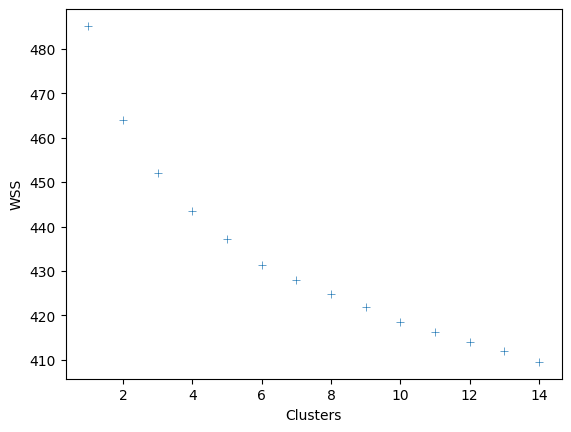

In [38]:
lyrics_df_dolly_txt = df_Dolly['lyrics'].values
transformer_model = SentenceTransformer('all-MiniLM-L6-v2')
transformer_encoded = transformer_model.encode(lyrics_df_dolly_txt)

K=range(1,15)

wss = [] 
# Run k-means for each possible k
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(transformer_encoded)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

k_wss = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
sns.scatterplot(x = 'Clusters', y = 'WSS', data = k_wss, marker="+")    
for i in range(2,15):
    labels=cluster.KMeans(n_clusters=i,init="k-means++").fit(transformer_encoded).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(transformer_encoded,labels,metric="euclidean",sample_size=1000,random_state=200)))


Dolly Topic count by cluster #2

In [35]:
# Cluster #2 has highest value
km = KMeans(n_clusters = 2) 
km.fit(transformer_encoded)
cluster_ids = km.labels_.tolist()
df_Dolly['cluster_id'] = cluster_ids
text_grouped_Dolly = df_Dolly.groupby(['cluster_id'])['lyrics'].apply(','.join).reset_index()
# Get most frequent 20 tokens per cluster
re_tokenizer = RegexpTokenizer("[\\w']+")
text_grouped_Dolly['tokens'] = text_grouped_Dolly['lyrics'].apply(re_tokenizer.tokenize) # Need to tokenize first for this to work

# Then lowercase and drop out stop words
text_grouped_Dolly['tokens'] = text_grouped_Dolly['tokens'].apply(lambda x: [word.lower() for word in x])
stopwords_nltk = set(nltk.corpus.stopwords.words('english'))
text_grouped_Dolly['tokens'] = text_grouped_Dolly['tokens'].apply(lambda x: [word for word in x if word not in stopwords_nltk])

clusters_words = []

for i in text_grouped_Dolly['tokens']:
    counter = Counter(i)
    clusters_words.append(counter.most_common(20))

clusters_words = pd.DataFrame(clusters_words)
clusters_words = clusters_words.transpose()
clusters_words.columns = ['Dolly_topic_1', 'Dolly_topic_2']
clusters_words


ValueError: Length of values (289) does not match length of index (742)

Silhouette score for k(clusters) = 2 is 0.0798071
Silhouette score for k(clusters) = 3 is 0.041845776
Silhouette score for k(clusters) = 4 is 0.032168377
Silhouette score for k(clusters) = 5 is 0.03248722
Silhouette score for k(clusters) = 6 is 0.02282838
Silhouette score for k(clusters) = 7 is 0.023696005
Silhouette score for k(clusters) = 8 is 0.025270967
Silhouette score for k(clusters) = 9 is 0.017492883
Silhouette score for k(clusters) = 10 is 0.014106633
Silhouette score for k(clusters) = 11 is 0.017751254
Silhouette score for k(clusters) = 12 is 0.016947003
Silhouette score for k(clusters) = 13 is 0.016381845
Silhouette score for k(clusters) = 14 is 0.012320516


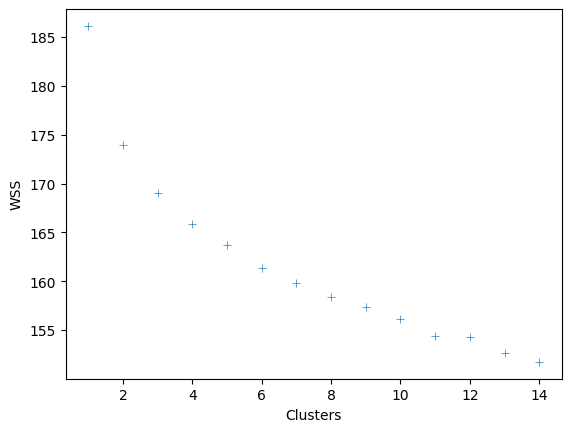

In [33]:
lyrics_df_connie_txt = df_Connie['lyrics'].values
transformer_model = SentenceTransformer('all-MiniLM-L6-v2')
transformer_encoded = transformer_model.encode(lyrics_df_connie_txt)
K=range(1,15)

wss = [] 

# Run k-means for each possible k
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(transformer_encoded)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)


k_wss = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
sns.scatterplot(x = 'Clusters', y = 'WSS', data = k_wss, marker="+")    
for i in range(2,15):
    labels=cluster.KMeans(n_clusters=i,init="k-means++").fit(transformer_encoded).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(transformer_encoded,labels,metric="euclidean",sample_size=1000,random_state=200)))

In [37]:
# Cluster #2 has highest value
km = KMeans(n_clusters = 2) 
km.fit(transformer_encoded)
cluster_ids = km.labels_.tolist()
df_Connie['cluster_id'] = cluster_ids
text_grouped_Connie = df_Connie.groupby(['cluster_id'])['lyrics'].apply(','.join).reset_index()
# Get most frequent 20 tokens per cluster
re_tokenizer = RegexpTokenizer("[\\w']+")
text_grouped_Connie['tokens'] = text_grouped_Connie['lyrics'].apply(re_tokenizer.tokenize) # Need to tokenize first for this to work

# Then lowercase and drop out stop words
text_grouped_Connie['tokens'] = text_grouped_Connie['tokens'].apply(lambda x: [word.lower() for word in x])
stopwords_nltk = set(nltk.corpus.stopwords.words('english'))
text_grouped_Connie['tokens'] = text_grouped_Connie['tokens'].apply(lambda x: [word for word in x if word not in stopwords_nltk])

clusters_words = []

for i in text_grouped_Connie['tokens']:
    counter = Counter(i)
    clusters_words.append(counter.most_common(20))

clusters_words = pd.DataFrame(clusters_words)
clusters_words = clusters_words.transpose()
clusters_words.columns = ['Connie_topic_1', 'Connie_topic_2']
clusters_words

,Connie_topic_1,Connie_topic_2
0,"(i'm, 87)","(love, 457)"
1,"(love, 67)","(i'm, 199)"
2,"(oh, 64)","(know, 154)"
3,"(pum, 63)","(never, 133)"
4,"(lord, 59)","(one, 130)"
5,"(little, 59)","(heart, 127)"
6,"(come, 55)","(i'll, 122)"
7,"(know, 55)","(time, 113)"
8,"(let, 54)","(can't, 112)"
9,"(see, 53)","(like, 110)"


In [18]:
df_grouped.loc[[5258]]

,artist,lyrics,lyrics_cleaned
5258,connie-smith,There goes my everything I hear footsteps slow...,goes everything hear footsteps slowly walkin' ...


In [19]:
df_grouped[df_grouped.artist=='dolly-parton']

,artist,lyrics,lyrics_cleaned
6969,dolly-parton,Downtown tonight I saw an old friend someone w...,downtown tonight saw old friend someone use ta...
